In [ ]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), subset='train', categories=['sci.electronics','rec.autos','rec.sport.hockey'])
train_documents = dataset.data
train_targets=dataset.target
train_target_names=dataset.target_names
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), subset='test', categories=['sci.electronics','rec.autos','rec.sport.hockey'])
test_documents = dataset.data
test_targets=dataset.target
test_target_names=dataset.target_names

## 1) Using CountVectorizer or otherwise, convert the list of documents to

### a) Use CountVectorizer to get the counts of each term (word) in each of the documents

In [ ]:
#train documents dataset
import pandas as pd
vectorizer = CountVectorizer()

x = vectorizer.fit_transform(train_documents)
df = pd.DataFrame(x.toarray(),
                      columns=vectorizer.get_feature_names())

#top 10 most common words
df.T.sort_values(by=0, ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784
the,3,7,1,1,4,1,0,0,18,9,...,1,12,2,2,0,15,11,3,17,0
was,2,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,3,0
_______,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
santore,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distorted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
distinguish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
distinctly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
distinctive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test document dataset
vectorizer = CountVectorizer()

x = vectorizer.fit_transform(test_documents)
df = pd.DataFrame(x.toarray(),
                      columns=vectorizer.get_feature_names())

#top 10 most common words
df.T.sort_values(by=0, ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
it,4,0,0,0,5,2,2,3,1,0,...,5,1,5,0,6,0,0,0,0,4
he,3,0,0,0,2,0,1,0,0,0,...,0,7,0,0,0,0,1,2,0,0
with,2,0,1,0,1,6,1,0,0,0,...,0,1,0,0,1,2,0,1,0,0
in,2,4,1,2,1,1,0,1,2,0,...,1,2,0,0,1,0,1,2,0,0
and,2,2,3,2,1,4,1,1,0,0,...,4,6,0,0,6,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
discussion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
discussions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
disels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
disengages,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### b) Write a function which returns the term frequency of each of the terms across all of the training documents. Use np.asarray() and np.squeeze() to ensure this produces a 1d output

In [ ]:
def compute_doc_frequencies(documents):
    vectorizer = CountVectorizer()

    counts = vectorizer.fit_transform(documents)

    document_frequencies = np.sum(counts, axis=0)

    return np.asarray( document_frequencies).squeeze()

train_document_frequencies = compute_doc_frequencies(train_documents)

### c) Using numpy.histogram followed by plt.hist, plot a histogram of the log of the term frequencies

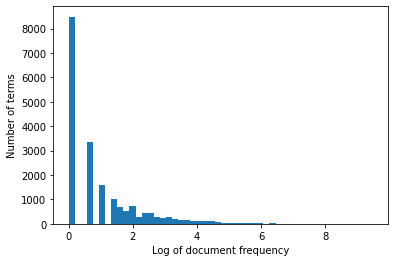

In [ ]:
hist, bins = np.histogram(np.log(train_document_frequencies), bins=50)
plt.hist(bins[:-1], bins, weights=hist)
plt.xlabel('Log of document frequency')
plt.ylabel('Number of terms')
plt.show()


### e) Write a function which returns the term inverse document frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Computing_term_inverse_document_frequencies(documents):
  
    vectorizer = TfidfVectorizer()
    x =vectorizer.fit_transform(documents)

    tfidf = x.toarray()
    words = vectorizer.get_feature_names()

    return words, tfidf


words, train_tidf = Computing_term_inverse_document_frequencies(train_documents)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df= pd.DataFrame(train_tidf, columns = words)

df.T.sort_values(by=0, ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784
santore,0.378243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_______,0.310971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flyers,0.239351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
john,0.217418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kinetic,0.189121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distorted,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
distinguish,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
distinctly,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
distinctive,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### f) Write a function which returns the tfidf weighted kernel for two sets of documents (i.e. train and test)

In [ ]:
def Computing_tfidf_weighted_kernel(train_documents, test_documents):

    vectorizer = TfidfVectorizer()


    vectorizer.fit(train_documents)

    train_tfidf = vectorizer.transform(train_documents)
    test_tfidf = vectorizer.transform(test_documents)


    train_kernel = train_tfidf * train_tfidf.T
    test_kernel = test_tfidf * train_tfidf.T


    return train_kernel, test_kernel



### g) Use an SVC classifier with the outputs of CountVectorizer (ie the term counts for each document) to classify the documents according to the train_targets and test_targets and present the performance of this classifier in a suitable way.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
target_names = train_target_names
vectorizer = CountVectorizer()

vectorizer.fit(train_documents)

train_counts = vectorizer.transform(train_documents)
test_counts = vectorizer.transform(test_documents)

clf = SVC()

clf.fit(train_counts, train_targets)

predictions = clf.predict(test_counts)

accuracy = accuracy_score(predictions, test_targets)

print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.641


In [ ]:

report = classification_report(test_targets, predictions, target_names=target_names)
print('Classification report:')
print(report)

Classification report:
                  precision    recall  f1-score   support

       rec.autos       0.49      0.93      0.64       396
rec.sport.hockey       0.98      0.56      0.71       399
 sci.electronics       0.81      0.43      0.56       393

        accuracy                           0.64      1188
       macro avg       0.76      0.64      0.64      1188
    weighted avg       0.76      0.64      0.64      1188



### h) Construct the tfidf kernel for the train (n_train x n_train) and test (n_test x n_train) data

In [ ]:
train_kernel, test_kernel = Computing_tfidf_weighted_kernel(train_documents, test_documents)

### i) use the SVC classifier again to classify the documents. Compare the performance to the previous case

In [ ]:
clf = SVC()

clf.fit(train_kernel, train_targets)

# predict the labels for the test data
predictions = clf.predict(test_kernel)

# calculate the accuracy of the predictions
accuracy = accuracy_score(predictions, test_targets)

# print the accuracy
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.850


In [ ]:
report = classification_report(test_targets, predictions, target_names=target_names)
print('Classification report:')
print(report)

Classification report:
                  precision    recall  f1-score   support

       rec.autos       0.75      0.89      0.81       396
rec.sport.hockey       0.99      0.85      0.91       399
 sci.electronics       0.85      0.82      0.83       393

        accuracy                           0.85      1188
       macro avg       0.86      0.85      0.85      1188
    weighted avg       0.86      0.85      0.85      1188



### the performance increased signficantly after applying the TF-IDF kernel to the training data, which helps by highlighting the important words for each documents. 

### j) Extension: Use (Kernel/Linear) PCA with varying dimensions of your tfidf kernel and repeat the classification or explore the eigenvalues of the kernel PCA and comment.

number of components: 50 accuracy: 0.840
number of components: 100 accuracy: 0.844
number of components: 150 accuracy: 0.843
number of components: 200 accuracy: 0.848
number of components: 250 accuracy: 0.848
number of components: 300 accuracy: 0.849
number of components: 350 accuracy: 0.848
number of components: 400 accuracy: 0.848
number of components: 450 accuracy: 0.850
number of components: 500 accuracy: 0.849
number of components: 550 accuracy: 0.851
number of components: 600 accuracy: 0.853
number of components: 650 accuracy: 0.852


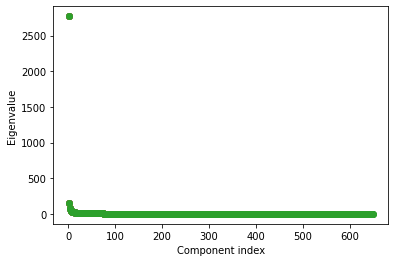

In [ ]:
from sklearn.decomposition import KernelPCA
dimension_values = range(50, 700, 50)
accuracy_scores = []
for i in dimension_values:

  pca = KernelPCA(n_components=i, kernel="linear")

  pca.fit(train_kernel)

  train_transformed = pca.transform(train_kernel)
  test_transformed = pca.transform(test_kernel)

  classifier = SVC()

  classifier.fit(train_transformed, train_targets)

  predictions = classifier.predict(test_transformed)

  accuracy = accuracy_score(predictions, test_targets)
  accuracy_scores.append(accuracy)
  
  eigenvalues = pca.eigenvalues_


  plt.scatter(range(1, len(eigenvalues)+1), eigenvalues)
  plt.xlabel("Component index")
  plt.ylabel("Eigenvalue")
  plt.show()

  print(f'number of components: {i} accuracy: {accuracy:.3f}')

<function matplotlib.pyplot.show(*args, **kw)>

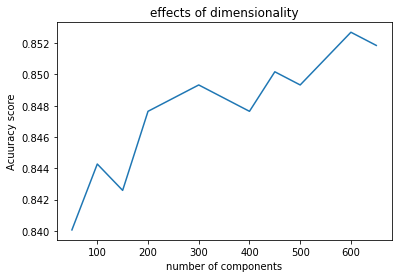

In [ ]:
plt.plot(dimension_values, accuracy_scores, label='SVC performance')
plt.title('effects of dimensionality')
plt.xlabel('number of components')
plt.ylabel('Acuuracy score')
plt.show

#### The best results obtain is when there is increase in the number of components (dimensions in the data) which seems helped the model to make better predictions. Although the eignvalue dropped to zero after introducing 100 components, which highlights increasing the number of components doesnt add much to the model as the data isnt that useful in higher dimensions. 